In [1]:
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D
import matplotlib.pyplot as plt

(<Axes: >, <matplotlib.image.AxesImage at 0x17d5126c190>)

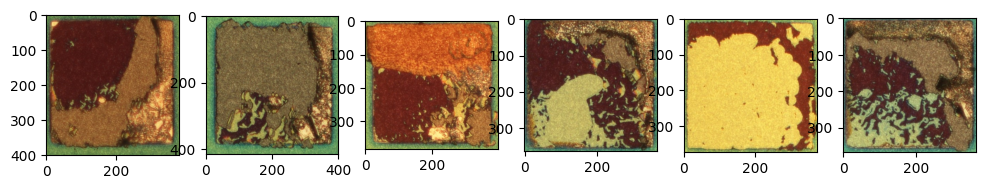

In [2]:
img1 = cv2.imread('../content/Image/train/1/AE49B4630F_0.302_1.jpg')
img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2RGB)

img2 = cv2.imread('../content/Image/train/2/AE7B30CA10_0.278_2.jpg')
img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2RGB)

img3 = cv2.imread('../content/Image/train/3/AC3E812213_0.213_3.jpg')
img3 = cv2.cvtColor(img3 , cv2.COLOR_BGR2RGB)

img4 = cv2.imread('../content/Image/train/4/AE7B30C40E_0.194_4.jpg')
img4 = cv2.cvtColor(img4 , cv2.COLOR_BGR2RGB)

img5 = cv2.imread('../content/Image/train/5/ACA7B2A921_0.124_5.jpg')
img5 = cv2.cvtColor(img5 , cv2.COLOR_BGR2RGB)

img6 = cv2.imread('../content/Image/train/6/ACA7B0F11D_0.222_6.jpg')
img6 = cv2.cvtColor(img6 , cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,4))
plt.subplot(161),plt.imshow(img1)
plt.subplot(162),plt.imshow(img2)
plt.subplot(163),plt.imshow(img3)
plt.subplot(164),plt.imshow(img4)
plt.subplot(165),plt.imshow(img5)
plt.subplot(166),plt.imshow(img6)

In [3]:
width = 128
num_classes = 6
trainpath = '../content/Image/train/'
testpath = '../content/Image/test/'
trainImg = [trainpath+f for f in listdir(trainpath)]
testImg = [testpath+f for f in listdir(testpath)]

print("Train Images:")
print(trainImg)
print("\nTest Images:")
print(testImg)

Train Images:
['../content/Image/train/1', '../content/Image/train/2', '../content/Image/train/3', '../content/Image/train/4', '../content/Image/train/5', '../content/Image/train/6']

Test Images:
['../content/Image/test/1', '../content/Image/test/2', '../content/Image/test/3', '../content/Image/test/4', '../content/Image/test/5', '../content/Image/test/6']


In [4]:
path = '../content/Image/train/1/AE49B4630F_0.302_1.jpg'
im = path.split('/')[-1]
print(im)

types = im.split('_')[-1]
print(types)

img_type = types.split('.')[1]
print(img_type)


AE49B4630F_0.302_1.jpg
1.jpg
jpg


In [6]:
def img2data(path):
    rawImgs = []
    labels = []

    for imagePath in (path):
        for item in tqdm(listdir(imagePath)):
            file = join(imagePath, item)
            if file[-1] =='g':
                img = cv2.imread(file , cv2.COLOR_BGR2RGB)
                img = cv2.resize(img ,(width,width))
                rawImgs.append(img)

                l = imagePath.split('/')[-1]
                k = l.split('_')[-1]
                type_img = k.split('.')[0]

                if type_img == '1':
                    labels.append([1, 0, 0, 0, 0, 0])
                elif type_img == '2':
                    labels.append([0, 1, 0, 0, 0, 0])
                elif type_img == '3':
                    labels.append([0, 0, 1, 0, 0, 0])
                elif type_img == '4':
                    labels.append([0, 0, 0, 1, 0, 0])
                elif type_img == '5':
                    labels.append([0, 0, 0, 0, 1, 0])
                elif type_img == '6':
                    labels.append([0, 0, 0, 0, 0, 1])

    return rawImgs, labels, len(rawImgs)

In [11]:
print('Data use to train :')
x_train, y_train, len_train = img2data(trainImg)

print('Data use to test :')
x_test, y_test, len_test = img2data(testImg)

Data use to train :


100%|██████████| 44/44 [00:00<00:00, 489.52it/s]


Data use to test :


100%|██████████| 11/11 [00:00<00:00, 334.46it/s]


In [12]:
print("Number of data points in the training dataset (len_train):", len_train)
print("Number of data points in the testing dataset (len_test):", len_test)

Number of data points in the training dataset (len_train): 199
Number of data points in the testing dataset (len_test): 48


In [13]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [14]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((199, 128, 128, 3), (199, 6), (48, 128, 128, 3), (48, 6))

In [15]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),
                                                include_top=False,
                                                weights='imagenet')
base_model.trainable = False
num_classes = 6

model = Sequential([
        base_model,

        Conv2D(128, 3, activation='relu'),
        Dense(16),
        Flatten(),
        Dense(num_classes, activation='softmax')
    ])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d (Conv2D)             (None, 2, 2, 128)         1474688   
                                                                 
 dense (Dense)               (None, 2, 2, 16)          2064      
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 3735126 (14.25 MB)
Trainable params: 1477142 (5.63 MB)
Non-trainable params: 2257984 (8.61 MB)
_____________

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics= ['accuracy'])
batch_size = 8
epochs = 10

In [18]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))

Epoch 1/10
25/25 [==============================] - 8s 168ms/step - loss: 2.9636 - accuracy: 0.5377 - val_loss: 3.4368 - val_accuracy: 0.4375
Epoch 2/10
25/25 [==============================] - 3s 113ms/step - loss: 0.4074 - accuracy: 0.8945 - val_loss: 2.5907 - val_accuracy: 0.5000
Epoch 3/10
25/25 [==============================] - 3s 102ms/step - loss: 0.0882 - accuracy: 0.9749 - val_loss: 2.8721 - val_accuracy: 0.5000
Epoch 4/10
25/25 [==============================] - 2s 94ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 2.5729 - val_accuracy: 0.5000
Epoch 5/10
25/25 [==============================] - 3s 107ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 2.3451 - val_accuracy: 0.5208
Epoch 6/10
25/25 [==============================] - 2s 97ms/step - loss: 7.1777e-04 - accuracy: 1.0000 - val_loss: 2.4330 - val_accuracy: 0.5625
Epoch 7/10
25/25 [==============================] - 3s 102ms/step - loss: 5.6601e-04 - accuracy: 1.0000 - val_loss: 2.4519 - val_accuracy: 0.5417


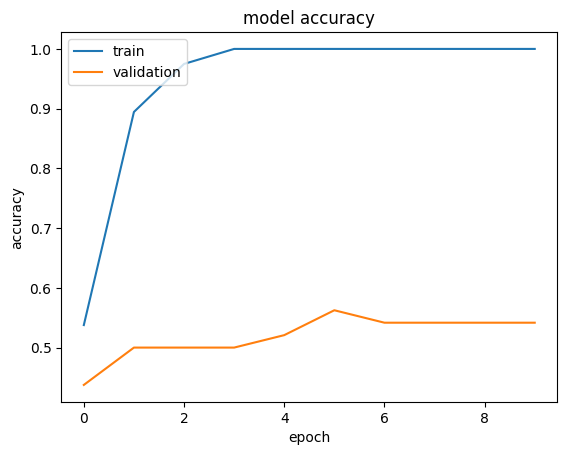

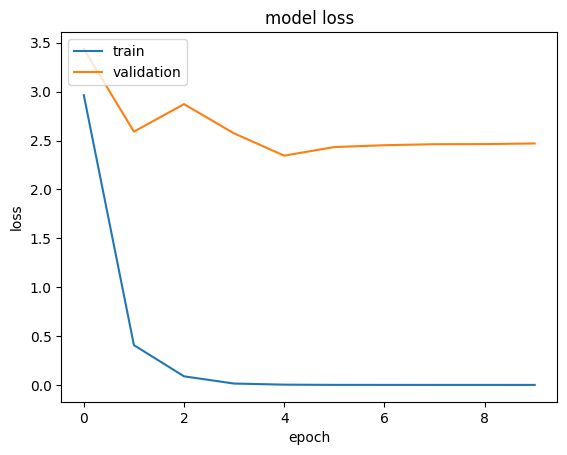

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
testpath = '../content/Image/test/'
testImg = [testpath + f for f in listdir(testpath) if listdir(join(testpath, f))]

type_accuracy = {}  # Dictionary to store accuracy for each type
correct_predictions = 0
total_predictions = 0

for imagePath in testImg:
    for item in listdir(imagePath):
        file = join(imagePath, item)
        if item.split('.')[0] != "":
            img = cv2.imread(file, cv2.COLOR_BGR2RGB)
            ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (width, width))
            rimg = np.array(img)
            rimg = rimg.astype('float32')
            rimg /= 255
            rimg = np.reshape(rimg, (1, 128, 128, 3))
            #fft add preprocessing
            predict = model.predict(rimg)
            label = ['1', '2', '3', '4', '5', '6']
            result = label[np.argmax(predict)] # choose highest value in array of predict
            value = item.split('_')[1]
            print(predict)
            print('value    :  ' + str(value))
            print('real     :  ' + str(item.split('_')[-1].split('.')[0]))
            print('predict  :  ' + str(result))

            # Check accuracy
            real_label = item.split('_')[-1].split('.')[0]
            if real_label == result:
                correct_predictions += 1
                if real_label in type_accuracy:
                    type_accuracy[real_label][0] += 1  # Correct predictions
                else:
                    type_accuracy[real_label] = [1, 0]  # [Correct predictions, Total predictions]
            if real_label in type_accuracy:
                type_accuracy[real_label][1] += 1  # Total predictions
            else:
                type_accuracy[real_label] = [0, 1]  # [Correct predictions, Total predictions]
            total_predictions += 1

            plt.imshow(ori)
            plt.show()

In [ ]:
testpath = '../content/Image/test/'
testImg = [testpath + f for f in listdir(testpath) if listdir(join(testpath, f))]

type_accuracy = {}  # Dictionary to store accuracy for each type
correct_predictions = 0
total_predictions = 0

for imagePath in testImg:
    for item in listdir(imagePath):
        file = join(imagePath, item)
        if item.split('.')[0] != "":
            img = cv2.imread(file, cv2.COLOR_BGR2RGB)
            ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (width, width))
            rimg = np.array(img)
            rimg = rimg.astype('float32')
            rimg /= 255
            rimg = np.reshape(rimg, (1, 128, 128, 3))
            predict = model.predict(rimg)
            label = ['1', '2', '3', '4', '5', '6']
            result = label[np.argmax(predict)] # choose highest value in array of predict
            value = item.split('_')[1]
            print(predict)
            print('value    :  ' + str(value))
            print('real     :  ' + str(item.split('_')[-1].split('.')[0]))
            
            sub_label = ['2','3','4','5','6','7','8','9','10','11']
            
            
            if result == '1' :
                print('predict  :  ' + str(result))
            elif result == '2' :
                if value > '0.2' :
                    print('predict  :  ' + str(2))
                else :
                    print('predict  :  ' + str(3))
            elif result == '3' :
                if value > '0.2' :
                    print('predict  :  ' + str(4))
                else :
                    print('predict  :  ' + str(5))
            elif result == '4' :
                if value > '0.2' :
                    print('predict  :  ' + str(6))
                else :
                    print('predict  :  ' + str(7))
            elif result == '5' :
                if value > '0.2' :
                    print('predict  :  ' + str(8))
                else :
                    print('predict  :  ' + str(9))
            elif result == '6' :
                if value > '0.2' :
                    print('predict  :  ' + str(10))
                else :
                    print('predict  :  ' + str(11))

            # Check accuracy
            real_label = item.split('_')[-1].split('.')[0]
            if real_label == result:
                correct_predictions += 1
                if real_label in type_accuracy:
                    type_accuracy[real_label][0] += 1  # Correct predictions
                else:
                    type_accuracy[real_label] = [1, 0]  # [Correct predictions, Total predictions]
            if real_label in type_accuracy:
                type_accuracy[real_label][1] += 1  # Total predictions
            else:
                type_accuracy[real_label] = [0, 1]  # [Correct predictions, Total predictions]
            total_predictions += 1

            plt.imshow(ori)
            plt.show()


In [34]:
# Calculate and print the overall accuracy with 2 decimal places
overall_accuracy = correct_predictions / total_predictions
print("Overall Accuracy: {:.3f}".format(overall_accuracy))

# Calculate and print accuracy for each type with 2 decimal places
for type_label, (correct, total) in type_accuracy.items():
    type_acc = correct / total
    print("Accuracy for Type {}: {:.3f}".format(type_label, type_acc))


Overall Accuracy: 0.542
Accuracy for Type 1: 0.000
Accuracy for Type 2: 0.700
Accuracy for Type 3: 0.750
Accuracy for Type 4: 0.600
Accuracy for Type 5: 0.750
Accuracy for Type 6: 0.091


Cut down type 1 because lack of data